<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/1_Basics/29_Matplotlib_Plotting.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Matplotlib Plotting

Load data.

In [1]:
# Install datasets Library (if not already installed)
# !pip install -U datasets

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  # we will use this for plotting

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

/Users/lukebarousse/opt/anaconda3/envs/python_course/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Line Graphs

### Notes

* `plot()` is used to draw points in a diagram.
* The default draws a line from point to point.
* It takes parameters for specifying points in the graph.
  * First parameter is the *x-axis*.
  * Second parameter is the *y-axis*.
  * Like this: `plt.plot(x-axis,y-axis)`.
* Used to display information as a series of data points called 'markers' connected by straight line segments.
* Ideal for showing trends over time or continuous data.

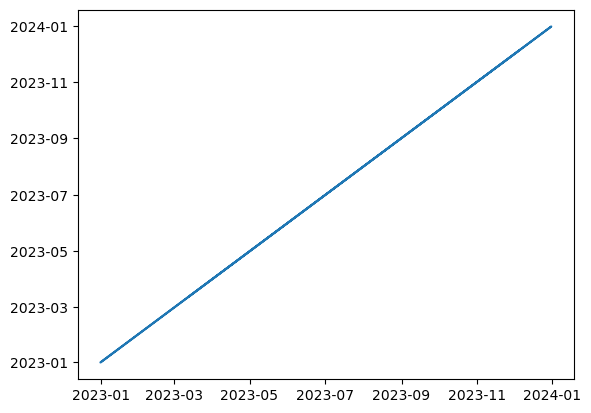

In [2]:
plt.plot(df['job_posted_date'], df['job_posted_date'])

Alternatively, we can compress what we have written:

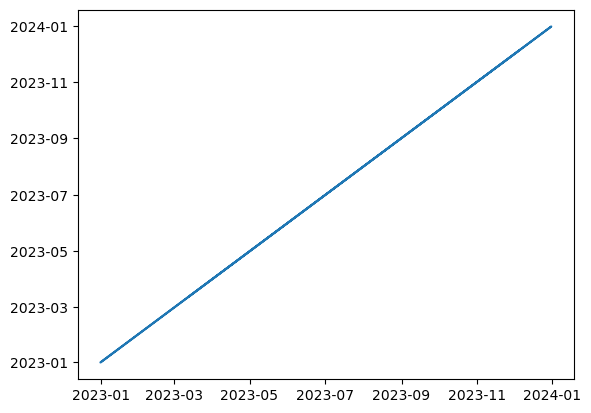

In [3]:
plt.plot('job_posted_date', 'job_posted_date', data=df)

But we want the counts of job over time.

What happens if we just aggregated by `job_posted_date`?

In [4]:
date_counts = df['job_posted_date'].value_counts()

date_counts = date_counts.sort_index()

date_counts

job_posted_date
2022-12-31 06:01:15    1
2022-12-31 06:01:17    1
2022-12-31 06:01:32    1
2022-12-31 06:02:02    1
2022-12-31 06:02:12    1
                      ..
2023-12-31 05:10:17    1
2023-12-31 05:14:10    1
2023-12-31 06:06:15    1
2023-12-31 06:06:25    1
2023-12-31 06:12:38    1
Name: count, Length: 608497, dtype: int64

### NOTE - `Series`

This `date_counts` is a `Series` object and NOT a `DataFrame`, it behaves differently then a DataFrame.

We can access the values of a `Series` object by passing the whole `Series` or specifying `Series.values`

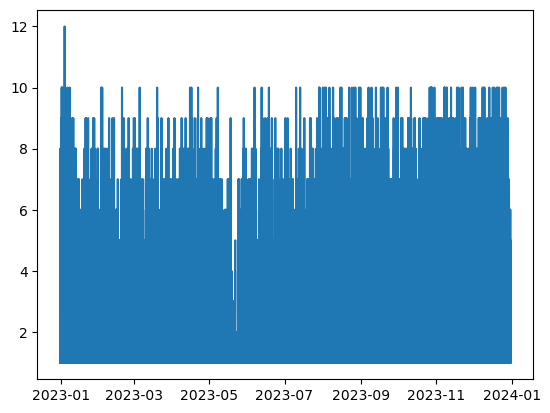

In [5]:
plt.plot(date_counts.index, date_counts)

Here we specify `Series.values`, it's a 1-D array effectively so either will work.

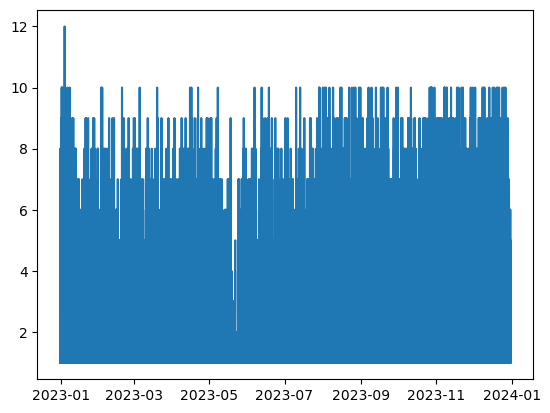

In [22]:
plt.plot(date_counts.index, date_counts.values)

This is a hot mess....

We need to extract the month using the attribute `dt` accessor and the attribute of `.month` from the `job_posted_date`.

In [7]:
# Assuming 'job_posted_date' is already converted to datetime format in the original df
df['job_posted_month'] = df['job_posted_date'].dt.month

# Group by 'month' and count the job postings
monthly_counts = df['job_posted_month'].value_counts()

# Sort the months
monthly_counts = monthly_counts.sort_index()

monthly_counts 

job_posted_month
1     92268
2     64661
3     64047
4     63005
5     52107
6     61539
7     63849
8     75161
9     62355
10    66705
11    64503
12    57486
Name: count, dtype: int64

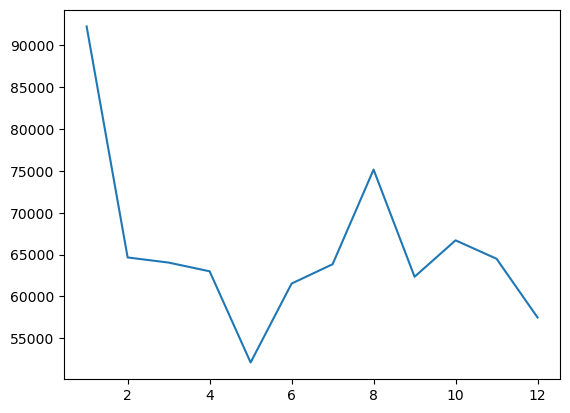

In [8]:
plt.plot(monthly_counts.index, monthly_counts)

## Series vs DataFrames in Pandas

A Series is one of the core data structures in pandas, akin to a one-dimensional array (like in NumPy) BUT with powerful, flexible indexing capabilities.

#### Core Characteristics
- One-Dimensional: It's essentially a single column of data.
- Indexed: Each element in a Series has an associated label, known as the index. The index can be numbers, dates, or even strings.
- Diverse Data Types: A Series can hold any data type—integers, strings, floats, Python objects, etc. However, all elements within a Series must be of the same data type.

In [9]:
# Creating a Series from a list
data = [10, 20, 30, 40, 50]
series = pd.Series(data, index=['a', 'b', 'c', 'd', 'e'])

In [10]:
# show how to access the values of the series using 'values'ArithmeticError
series.values

array([10, 20, 30, 40, 50])

In [11]:
series.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

## Bar Charts

### Notes

* Used to compare different groups or to track changes over time.
* Best for categorical data comparison.
* In Python we have two types of bar charts:
    1. Bar Plots - bars are vertical 
    2. Horizontal Bar Plot - bars are horizontal

### Bar Plot

#### Notes

* `plt.bar()` for vertical bar plots.
* Syntax: `plt.bar(categories, values)`
* The bars are vertical.

 Then we get the value counts of the job titles for the filtered DataFrame. 

In [12]:
# Get the value counts of the job titles for the filtered DataFrame
job_counts = df['job_title_short'].value_counts()

job_counts

job_title_short
Data Analyst                 196593
Data Engineer                186678
Data Scientist               172727
Business Analyst              49160
Software Engineer             45019
Senior Data Engineer          44692
Senior Data Scientist         37076
Senior Data Analyst           29289
Machine Learning Engineer     14106
Cloud Engineer                12346
Name: count, dtype: int64

Now let's plot `job_counts`

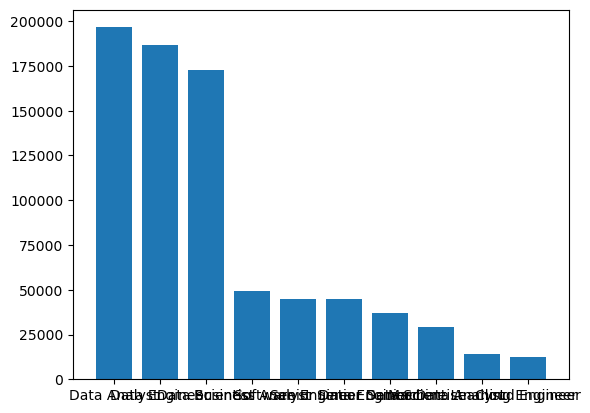

In [13]:
plt.bar(job_counts.index, job_counts.values)
plt.show()

This isn't that readable. Instead, let's only get the top 3 most requested job titles in the United States. We're only getting the top 3 because that's all that fits on the x-axis without having to customize the x-axis using something else (which we will do in a bit).

<BarContainer object of 3 artists>

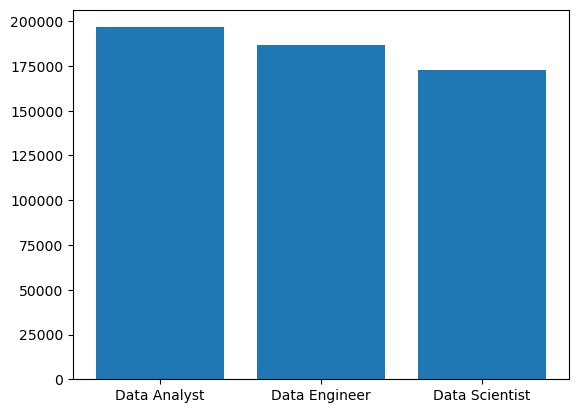

In [14]:
# Get the value counts of the job titles for the filtered DataFrame
job_counts = df['job_title_short'].value_counts().head(3) # Only top 3 

# Plot the job counts
plt.bar(job_counts.index, job_counts.values)  

### Horizontal Bar Plot

#### Notes

* This is similar to a bar chart but the bars are horizontal.
* Even the syntax is similar: `plt.barh(categories, values)`.
* It's useful when chart labels are lengthy (like in our previous example).
* Good for comparing the size of categories or when the text labels are too long to fit well under a vertical bar.

#### Example 

Let's redo our graph and make it a horizontal bar chart instead. This way we can look at more jobs without having to format the axis. Let's look at the top 5. 

In [15]:
# Get the value counts of the job titles for the filtered DataFrame
job_counts = df['job_title_short'].value_counts()
job_counts = job_counts.head(6)
job_counts = job_counts.sort_values(ascending=True)

job_counts

job_title_short
Senior Data Engineer     44692
Software Engineer        45019
Business Analyst         49160
Data Scientist          172727
Data Engineer           186678
Data Analyst            196593
Name: count, dtype: int64

For readability, you can use parenthesis instead if chaining multiple methods

In [16]:
job_counts = (
    df['job_title_short']
    .value_counts()
    .head(6)
    .sort_values(ascending=True)
)

job_counts

job_title_short
Senior Data Engineer     44692
Software Engineer        45019
Business Analyst         49160
Data Scientist          172727
Data Engineer           186678
Data Analyst            196593
Name: count, dtype: int64

Let's plot it!

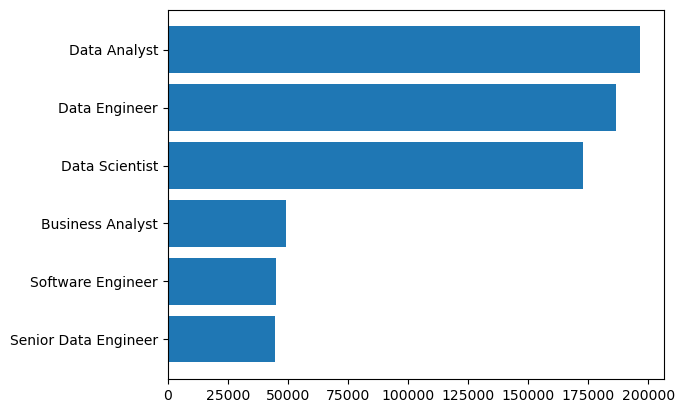

In [17]:
plt.barh(job_counts.index, job_counts)  # Changed this to be a horizontal bar chart instead
plt.show()

### Note - `plt.show()`

* You may see `plt.show()` at the bottom of some plots, but it's not required in Jupyter Notebooks [per the documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html):
> **Auto-show in jupyter notebooks**  
> The jupyter backends (activated via %matplotlib inline, %matplotlib notebook, or %matplotlib widget), call show() at the end of every cell by default. Thus, you usually don't have to call it explicitly there.
* TLDR: Inside of Jupyter Notebooks, the functionality automatically shows the graph